# IBM Data Science Capstone Project
## Yaroslav Aulin

Problem Statement

The people of New York use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their  questions:

Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?

Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?

Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning.

In [1]:
# import pandas library
import pandas as pd

In [2]:
# Read the NYC 311 Dataset

#https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
#https://cocl.us/311_NYC_Dataset


#path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

path_NYC311="https://cocl.us/311_NYC_Dataset?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status"


df_NYC311 = pd.read_csv(path_NYC311,parse_dates=True)

In [3]:
# Create Credential and Bucket Variables

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3


# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cred = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='F2S4IZJuCCwvKymK8226lFl1UP5QUCDGEDy0AWmb_Bn7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')



bucket = 'ibmdatasciencecapstoneproject-donotdelete-pr-pvvc664o5el5ua'


In [4]:
# create a pickle file

df_NYC311.to_pickle('./df_NYC311_raw.pkl')

# upload a pickle file to Cloud Object Store

client_cred.upload_file('./df_NYC311_raw.pkl',bucket,'df_NYC311_raw_cos.pkl')

In [5]:
# download a pickle file from Cloud Object Store


client_cred.download_file(Bucket=bucket,Key='df_NYC311_raw_cos.pkl',Filename='./df_NYC311_raw_local.pkl')


# create a dataframe out of pickle file


df_NYC311 = pd.read_pickle('./df_NYC311_raw_local.pkl')

In [6]:
# get the NYC PLUTO Dataset
!wget https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip

--2020-08-04 12:55:28--  https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip
Resolving www1.nyc.gov (www1.nyc.gov)... 184.29.152.59, 2600:1404:3c00:1aa::1500, 2600:1404:3c00:1b0::1500
Connecting to www1.nyc.gov (www1.nyc.gov)|184.29.152.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48263311 (46M) [application/zip]
Saving to: ‘nyc_pluto_18v1.zip’

100%[======================================>] 48,263,311   179MB/s   in 0.3s   

2020-08-04 12:55:29 (179 MB/s) - ‘nyc_pluto_18v1.zip’ saved [48263311/48263311]



In [7]:
!ls

df_NYC311_raw_local.pkl  df_NYC311_raw.pkl  nyc_pluto_18v1.zip


In [8]:
# extract the file from archive
!unzip -o nyc_pluto_18v1.zip

Archive:  nyc_pluto_18v1.zip
  inflating: PLUTO_for_WEB/BK_18v1.csv  
  inflating: PLUTO_for_WEB/BX_18v1.csv  
  inflating: PLUTO_for_WEB/MN_18v1.csv  
  inflating: PLUTO_for_WEB/PLUTODD18v1.pdf  
  inflating: PLUTO_for_WEB/PlutoReadme18v1.pdf  
  inflating: PLUTO_for_WEB/QN_18v1.csv  
  inflating: PLUTO_for_WEB/SI_18v1.csv  


In [9]:
!ls

df_NYC311_raw_local.pkl  df_NYC311_raw.pkl  nyc_pluto_18v1.zip	PLUTO_for_WEB


In [10]:
# read .csv files to dataframes

df_BK = pd.read_csv('PLUTO_for_WEB/BK_18v1.csv',parse_dates=True)  # Brooklyn
df_BX = pd.read_csv('PLUTO_for_WEB/BX_18v1.csv',parse_dates=True)  # Bronx
df_MN = pd.read_csv('PLUTO_for_WEB/MN_18v1.csv',parse_dates=True)  # Manhattan
df_QN = pd.read_csv('PLUTO_for_WEB/QN_18v1.csv',parse_dates=True)  # Queens
df_SI = pd.read_csv('PLUTO_for_WEB/SI_18v1.csv',parse_dates=True)  # Staten Island


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,23,24,26,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,77) have mixed types. Specify dtype 

In [11]:
# create pickle files

df_BK.to_pickle('./df_BK_raw.pkl')
df_BX.to_pickle('./df_BX_raw.pkl')
df_MN.to_pickle('./df_MN_raw.pkl')
df_QN.to_pickle('./df_QN_raw.pkl')
df_SI.to_pickle('./df_SI_raw.pkl')


In [12]:
# upload pickle files to Cloud Object Store

client_cred.upload_file('./df_BK_raw.pkl',bucket,'df_BK_raw_cos.pkl')
client_cred.upload_file('./df_BX_raw.pkl',bucket,'df_BX_raw_cos.pkl')
client_cred.upload_file('./df_MN_raw.pkl',bucket,'df_MN_raw_cos.pkl')
client_cred.upload_file('./df_QN_raw.pkl',bucket,'df_QN_raw_cos.pkl')
client_cred.upload_file('./df_SI_raw.pkl',bucket,'df_SI_raw_cos.pkl')


## Exploring NYC 311 dataset

In [13]:
df_NYC311.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [14]:
df_NYC311.tail()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
6019838,6019838,44063685,10/15/2019 10:35:45 AM,10/16/2019 05:55:02 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10029.0,327 EAST 108 STREET,EAST 108 STREET,ADDRESS,NEW YORK,Closed,The complaint you filed is a duplicate of a co...,MANHATTAN,40.791359,-73.940184
6019839,6019839,44063692,10/15/2019 06:09:28 AM,10/15/2019 04:12:58 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10461.0,3555 BRUCKNER BOULEVARD,BRUCKNER BOULEVARD,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.847809,-73.827481
6019840,6019840,44063724,10/15/2019 10:54:45 AM,10/16/2019 06:14:29 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,The complaint you filed is a duplicate of a co...,MANHATTAN,40.864764,-73.922764
6019841,6019841,44063726,10/15/2019 02:07:34 PM,10/16/2019 07:10:19 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10467.0,66 WEST GUN HILL ROAD,WEST GUN HILL ROAD,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.883207,-73.884279
6019842,6019842,44063737,10/15/2019 11:29:01 AM,10/15/2019 09:19:45 PM,PAINT/PLASTER,RESIDENTIAL BUILDING,10009.0,143 AVENUE D,AVENUE D,ADDRESS,NEW YORK,Closed,The Department of Housing Preservation and Dev...,MANHATTAN,40.724749,-73.975269


In [15]:
df_NYC311.dtypes

Unnamed: 0                  int64
Unique Key                  int64
Created Date               object
Closed Date                object
Complaint Type             object
Location Type              object
Incident Zip              float64
Incident Address           object
Street Name                object
Address Type               object
City                       object
Status                     object
Resolution Description     object
Borough                    object
Latitude                  float64
Longitude                 float64
dtype: object

In [16]:
# convert date columns from object to datetime

df_NYC311['Created Date']=pd.to_datetime(df_NYC311['Created Date'],format="%m/%d/%Y  %I:%M:%S %p")
df_NYC311['Closed Date']=pd.to_datetime(df_NYC311['Closed Date'],format="%m/%d/%Y  %I:%M:%S %p")

In [17]:
df_NYC311.dtypes

Unnamed: 0                         int64
Unique Key                         int64
Created Date              datetime64[ns]
Closed Date               datetime64[ns]
Complaint Type                    object
Location Type                     object
Incident Zip                     float64
Incident Address                  object
Street Name                       object
Address Type                      object
City                              object
Status                            object
Resolution Description            object
Borough                           object
Latitude                         float64
Longitude                        float64
dtype: object

The dataset contains complaints logged since what date?

In [18]:
df_NYC311['Created Date'].min()

Timestamp('2010-01-01 00:00:00')

The dataset contains complaints logged till what date?

In [19]:
df_NYC311['Created Date'].max()

Timestamp('2020-02-02 23:58:57')

How many incidents have a missing Incident Address?

In [20]:
df_NYC311['Incident Address'].isnull().sum()

52825

## Exploring PLUTO dataset

How many valid ZIP Codes exist in the Bronx PLUTO dataset?

Exploring Bronx dataset

In [21]:
df_BX.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [22]:
import numpy as np

zipcodes_BX=df_BX['ZipCode'].unique()
zipcodes_BX = zipcodes_BX[~np.isnan(zipcodes_BX)] #exclude NaN value
zipcodes_BX



array([10454., 10455., 10451., 10456., 10452., 10453., 10465., 10474.,
       11370., 10459., 10472., 10457., 10460., 10458., 10468., 10463.,
       10467., 10470., 10466., 10473., 10462., 10461., 10469., 10475.,
       10464., 10471.])

In [23]:
len(zipcodes_BX)

26

How many valid ZIP Codes exist in the Queens PLUTO dataset?

In [24]:
zipcodes_QN=df_QN['ZipCode'].unique()
zipcodes_QN = zipcodes_QN[~np.isnan(zipcodes_QN)] #exclude NaN value
zipcodes_QN

array([11101., 11109., 11104., 11377., 11106., 11102., 11103., 11105.,
       11370., 11369., 11372., 11373., 11385., 11368., 11421., 11355.,
       11374., 11375., 11367., 11415., 11378., 11379., 11418., 11432.,
       11356., 11420., 11357., 11354., 11697., 11693., 11358., 11361.,
       11365., 11364., 11360., 11359., 11435., 11366., 11423., 11363.,
       11362., 11427., 11426., 11428., 11004., 11005., 11040., 11001.,
       11416., 11417., 11419., 11433., 11413., 11434., 11412., 11429.,
       11411., 11414., 11430., 11436., 11422., 11691., 11692., 11694.,
       11695.])

In [25]:
len(zipcodes_QN)

65

## Exploring NYC 311 dataset

What is the total number of complaints that exist in the dataset?

In [26]:
len(df_NYC311)

6019843

How many differnt Complaint Types can you find in the dataset, including duplicates entries of the same type?

In [27]:
df_NYC311['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'Unsanitary Condition', 'HPD Literature Request', 'HEATING',
       'PAINT - PLASTER', 'Safety', 'Electric', 'General', 'Appliance',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'AGENCY',
       'STRUCTURAL', 'VACANT APARTMENT', 'Outside Building', 'Plumbing',
       'Mold'], dtype=object)

In [28]:
len(df_NYC311['Complaint Type'].unique())

30

How many Elevator complaints can you find in the dataset?
How many Electric complaints can you find in the dataset?


In [29]:
df_NYC311.groupby(by='Complaint Type').count()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
Complaint Type,,,,,,,,,,,,,,,
AGENCY,9,9,9,9,9,8,9,9,8,8,9,9,9,8,8
APPLIANCE,112831,112831,112831,109163,112831,112677,112831,112831,112735,112693,112831,112803,112831,112677,112677
Appliance,4,4,4,2,4,4,4,4,0,4,4,0,4,4,4
CONSTRUCTION,5078,5078,5078,4821,5078,5044,5078,5078,5057,5044,5078,5062,5078,5044,5044
DOOR/WINDOW,205278,205278,205278,204059,205278,205133,205278,205278,205199,205149,205278,205271,205278,205133,205133
ELECTRIC,307310,307310,307310,298849,307310,306447,307310,307310,306641,306472,307310,307272,307310,306449,306449
ELEVATOR,6725,6725,6725,6631,6725,6720,6725,6725,6722,6720,6725,6725,6725,6720,6720
Electric,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1
FLOORING/STAIRS,137402,137402,137402,136595,137402,137313,137402,137402,137348,137314,137402,137400,137402,137313,137313


rename values

In [30]:
df_NYC311['Complaint Type']=df_NYC311['Complaint Type'].replace(['General'],'GENERAL')
df_NYC311['Complaint Type']=df_NYC311['Complaint Type'].replace(['Appliance'],'APPLIANCE')
df_NYC311['Complaint Type']=df_NYC311['Complaint Type'].replace(['Electric'],'ELECTRIC')
df_NYC311['Complaint Type']=df_NYC311['Complaint Type'].replace(['Outside Building'],'OUTSIDE BUILDING')
df_NYC311['Complaint Type']=df_NYC311['Complaint Type'].replace(['PAINT - PLASTER'],'PAINT/PLASTER')
df_NYC311['Complaint Type']=df_NYC311['Complaint Type'].replace(['Plumbing'],'PLUMBING')
df_NYC311['Complaint Type']=df_NYC311['Complaint Type'].replace(['Safety'],'SAFETY')
df_NYC311['Complaint Type']=df_NYC311['Complaint Type'].replace(['Unsanitary Condition'],'UNSANITARY CONDITION')
df_NYC311['Complaint Type']=df_NYC311['Complaint Type'].replace(['HEATING'],'HEAT/HOT WATER')




Using 80,000 as a threshold, what complaint type(s) do you recommend the Department of Housing Preservation and Development of New York City address first? Select all that apply.

In [31]:
grouped=df_NYC311.groupby(by='Complaint Type').count().loc[:, ['Unique Key']]
grouped.rename(columns={'Unique Key':'Cases'}, inplace=True)
grouped


,Cases
Complaint Type,
AGENCY,9
APPLIANCE,112835
CONSTRUCTION,5078
DOOR/WINDOW,205278
ELECTRIC,307311
ELEVATOR,6725
FLOORING/STAIRS,137402
GENERAL,152471
GENERAL CONSTRUCTION,500863


In [32]:
top_complaints=grouped[grouped>80000].dropna()
top_complaints

,Cases
Complaint Type,
APPLIANCE,112835.0
DOOR/WINDOW,205278.0
ELECTRIC,307311.0
FLOORING/STAIRS,137402.0
GENERAL,152471.0
GENERAL CONSTRUCTION,500863.0
HEAT/HOT WATER,2149424.0
NONCONST,260890.0
PAINT/PLASTER,707695.0


In [33]:
# sort by number of complaints

top_complaints.sort_values(by=['Cases'],ascending = False)

,Cases
Complaint Type,
HEAT/HOT WATER,2149424.0
PLUMBING,711141.0
PAINT/PLASTER,707695.0
GENERAL CONSTRUCTION,500863.0
UNSANITARY CONDITION,457142.0
ELECTRIC,307311.0
NONCONST,260890.0
DOOR/WINDOW,205278.0
WATER LEAK,193631.0


For the complaint types that you selected in the previous module that had at least 80,000 complaints logged, which borough had the highest number of complaints submitted?

In [34]:
tc_array=top_complaints.index.values
tc_array

array(['APPLIANCE', 'DOOR/WINDOW', 'ELECTRIC', 'FLOORING/STAIRS',
       'GENERAL', 'GENERAL CONSTRUCTION', 'HEAT/HOT WATER', 'NONCONST',
       'PAINT/PLASTER', 'PLUMBING', 'UNSANITARY CONDITION', 'WATER LEAK'],
      dtype=object)

In [35]:
df_tclist=df_NYC311[['Complaint Type','Borough']]
df_tclist

,Complaint Type,Borough
0,HEAT/HOT WATER,MANHATTAN
1,UNSANITARY CONDITION,BROOKLYN
2,HEAT/HOT WATER,QUEENS
3,HEAT/HOT WATER,BRONX
4,APPLIANCE,BROOKLYN
5,HEAT/HOT WATER,BRONX
6,GENERAL,BROOKLYN
7,HEAT/HOT WATER,QUEENS
8,ELECTRIC,BROOKLYN
9,HEAT/HOT WATER,BROOKLYN


In [36]:
df_tclist = df_tclist[df_tclist['Complaint Type'].isin(tc_array)]

In [37]:
grouped1 = df_tclist.groupby(by='Borough').count()
grouped1.rename(columns={'Complaint Type':'Number of Complaints'}, inplace=True)
grouped1.sort_values(by=['Number of Complaints'],ascending = False, inplace=True)
grouped1

,Number of Complaints
Borough,
BROOKLYN,1714713
BRONX,1599894
MANHATTAN,1041994
Unspecified,818871
QUEENS,634703
STATEN ISLAND,85908


For the complaint types that you selected in the previous module that had at least 80,000 complaints logged, which ZIP code had the highest number of complainted submitted?

In [38]:
df_tclist1=df_NYC311[['Complaint Type','Incident Zip']]
df_tclist1 = df_tclist1[df_tclist1['Complaint Type'].isin(tc_array)]
df_tclist1.head()

,Complaint Type,Incident Zip
0,HEAT/HOT WATER,10019.0
1,UNSANITARY CONDITION,11204.0
2,HEAT/HOT WATER,11372.0
3,HEAT/HOT WATER,10458.0
4,APPLIANCE,11209.0


In [39]:
grouped2 = df_tclist1.groupby(by='Incident Zip').count()
grouped2.rename(columns={'Complaint Type':'Number of Complaints'}, inplace=True)
grouped2.sort_values(by=['Number of Complaints'],ascending = False, inplace=True)
grouped2.head()

,Number of Complaints
Incident Zip,
11226.0,213855
10467.0,172285
10458.0,168025
10453.0,161053
10468.0,146893


For the complaint types that you selected in the previous module that had at least 80,000 complaints logged, the address 89-21 Elmhurst Avenue had the highest number of complainted submitted?

In [40]:
df_tclist2=df_NYC311[['Complaint Type','Incident Address']]
df_tclist2 = df_tclist2[df_tclist2['Complaint Type'].isin(tc_array)]


grouped2 = df_tclist2.groupby(by='Incident Address').count()
grouped2.rename(columns={'Complaint Type':'Number of Complaints'}, inplace=True)
grouped2.sort_values(by=['Number of Complaints'],ascending = False, inplace=True)
grouped2.head()

,Number of Complaints
Incident Address,
34 ARDEN STREET,14294
89-21 ELMHURST AVENUE,12681
1025 BOYNTON AVENUE,9716
3810 BAILEY AVENUE,7174
9511 SHORE ROAD,5062


For the complaint types that you selected in the previous module that had at least 80,000 complaints logged, how many of the submitted tickets were closed?


In [41]:
df_tclist3=df_NYC311[['Complaint Type','Closed Date']]
df_tclist3=df_tclist3[df_tclist3['Complaint Type'].isin(tc_array)].dropna()
df_tclist3.head()

,Complaint Type,Closed Date
33,HEAT/HOT WATER,2020-02-02 18:53:37
82,HEAT/HOT WATER,2020-02-02 18:06:59
85,HEAT/HOT WATER,2020-02-02 18:53:37
168,HEAT/HOT WATER,2020-02-02 18:53:37
179,HEAT/HOT WATER,2020-02-02 18:07:00


In [42]:
df_tclist3.count()

Complaint Type    5771205
Closed Date       5771205
dtype: int64

Can you determine the age of the building from the PLUTO dataset?

In [43]:
df_BK.columns   # YearBuilt column

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCenterDistrict',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tra

Top complaint type - HEAT/HOT WATER

Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

In this exercise, you will use 311 Dataset to determine whether to focus on any particular borough, ZIP code, or street (where the complaints are severe) for the specific Complaint Type you decided to focus at the end of the last exercise.

In [44]:
df_NYC311_01=df_NYC311[df_NYC311['Complaint Type']=='HEAT/HOT WATER']
df_NYC311_01.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,2020-02-02 06:09:17,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
2,2,45527528,2020-02-02 02:27:41,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,2020-02-02 12:13:18,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
5,5,45530344,2020-02-02 07:52:08,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,10456.0,1131 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.831381,-73.915218
7,7,45527939,2020-02-02 09:00:54,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,37-20 81 STREET,81 STREET,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.749320,-73.885190


In [45]:
grouped3=df_NYC311_01[['Unique Key','Borough']].groupby(by='Borough').count()
grouped3.rename(columns={'Unique Key':'Number of Complaints'}, inplace=True)
grouped3


,Number of Complaints
Borough,
BRONX,606133
BROOKLYN,574845
MANHATTAN,423039
QUEENS,244122
STATEN ISLAND,18368
Unspecified,282917


In [46]:
grouped4=df_NYC311_01[['Unique Key','Incident Zip']].groupby(by='Incident Zip').count()
grouped4.rename(columns={'Unique Key':'Number of Complaints'}, inplace=True)
grouped4.sort_values(by='Number of Complaints',ascending=False,inplace=True)
grouped4.head()

,Number of Complaints
Incident Zip,
11226.0,69041
10467.0,66073
10458.0,65372
10468.0,58190
10453.0,57818


In [47]:
grouped4=df_NYC311_01[['Unique Key','Street Name']].groupby(by='Street Name').count()
grouped4.rename(columns={'Unique Key':'Number of Complaints'}, inplace=True)
grouped4.sort_values(by='Number of Complaints',ascending=False,inplace=True)
grouped4.head()

,Number of Complaints
Street Name,
GRAND CONCOURSE,37863
BROADWAY,24484
OCEAN AVENUE,18716
MORRIS AVENUE,16409
ARDEN STREET,15963


In this exercise, use the 311 dataset.

You also need to read back the PLUTO dataset from Cloud Object Store that you saved previously in the course. Use the PLUTO dataset for the borough that you already identified to focus on the last exercise.Ensure that you use only a limited number of fields from the dataset so that you are not consuming too much memory during your analysis.

The recommended fields are Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord.

At the end of this exercise, you should determine whether the type of complaint that you have identified as the response to Question 1 has an obvious relationship with any particular characteristic or characteristics of the houses.

In [48]:
df_BX.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [49]:
df_BX.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCenterDistrict',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tra

In [50]:
#set address as index

df_BX1=df_BX.set_index('Address')
df_BX1.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
Address,,,,,,,,,,,,,,,,,,,,,
122 BRUCKNER BOULEVARD,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
126 BRUCKNER BOULEVARD,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
138 BRUCKNER BOULEVARD,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
144 BRUCKNER BOULEVARD,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
148 BRUCKNER BOULEVARD,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [51]:
df_NYC311_01=df_NYC311[df_NYC311['Borough']=='BRONX']
df_NYC311_01.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
3,3,45530329,2020-02-02 12:13:18,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
5,5,45530344,2020-02-02 07:52:08,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,10456.0,1131 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.831381,-73.915218
10,10,45530349,2020-02-02 05:38:39,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,10459.0,1032 ALDUS STREET,ALDUS STREET,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.823282,-73.887462
16,16,45528878,2020-02-02 04:11:19,NaT,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10456.0,488 EAST 164 STREET,EAST 164 STREET,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.825719,-73.909531
19,19,45529362,2020-02-02 13:38:25,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,10473.0,880 BOYNTON AVENUE,BOYNTON AVENUE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.821314,-73.876507


In [52]:
df_NYC311_01.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date',
       'Complaint Type', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Address Type', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

In [53]:
df_NYC311_02=df_NYC311_01[['Unique Key','Incident Address']].groupby('Incident Address').count().sort_values(by='Unique Key',ascending=False).rename(columns={'Unique Key':'Number of Complaints'})
df_NYC311_02.head()

,Number of Complaints
Incident Address,
1025 BOYNTON AVENUE,9737
3810 BAILEY AVENUE,7171
750 GRAND CONCOURSE,4183
3555 BRUCKNER BOULEVARD,4158
888 GRAND CONCOURSE,3994


In [54]:
df_BX1['WaterIncidents']=0   #add column

df_BX1.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCenterDistrict',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'X

In [55]:
for address1 in df_NYC311_02.index:
    if address1 in df_BX1.index:
        df_BX1.loc[address1,'WaterIncidents']=df_NYC311_02.loc[address1,'Number of Complaints']

    


In [56]:
df_BX1.sort_values(by='WaterIncidents',ascending=False,inplace=True)
df_BX1.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version,WaterIncidents
Address,,,,,,,,,,,,,,,,,,,,,
1025 BOYNTON AVENUE,BX,3714,54,209,50.01,2000.0,8.0,18.0,10472.0,L054,...,217 034,21409.0,NaN,0.0,NaN,1,NaN,NaN,18V1,9737
3810 BAILEY AVENUE,BX,3263,7,208,279.00,6000.0,10.0,11.0,10463.0,L046,...,213 040,21201.0,NaN,0.0,NaN,1,NaN,NaN,18V1,7171
750 GRAND CONCOURSE,BX,2458,26,204,59.02,2001.0,7.0,17.0,10451.0,E071,...,209N065,20906.0,NaN,0.0,NaN,1,NaN,NaN,18V1,4183
3555 BRUCKNER BOULEVARD,BX,4178,10,210,266.02,4000.0,8.0,13.0,10461.0,E089,...,221 006,21508.0,NaN,0.0,NaN,1,NaN,NaN,18V1,4158
888 GRAND CONCOURSE,BX,2459,34,204,59.02,1000.0,7.0,16.0,10451.0,E071,...,210S006,20906.0,NaN,0.0,NaN,1,NaN,NaN,18V1,3994


The recommended fields are Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord.

In [57]:
df_BX2=df_BX1[['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord','XCoord','WaterIncidents']]

In [58]:
df_BX2.head()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,WaterIncidents
Address,,,,,,,,,,,,,,,,,,,,
1025 BOYNTON AVENUE,61500,87.00,4.99,0.0,4.8,54,12319,100.00,1,6.0,0,61500,2.43,0,1931,0,10472.0,239710.0,1018133.0,9737
3810 BAILEY AVENUE,54001,92.00,2.53,0.0,4.8,7,21320,164.00,1,5.0,0,54000,3.44,0,1925,0,10463.0,261446.0,1012722.0,7171
750 GRAND CONCOURSE,123000,110.00,5.91,0.0,6.5,26,20800,120.70,1,6.0,0,123000,6.02,0,1937,0,10451.0,239122.0,1005249.0,4183
3555 BRUCKNER BOULEVARD,112000,53.33,6.40,0.0,4.8,10,17500,100.00,1,12.0,0,112000,3.44,0,1960,0,10461.0,248258.0,1031866.0,4158
888 GRAND CONCOURSE,122800,178.00,4.32,0.0,6.5,34,28444,188.55,1,6.0,8000,111800,6.02,3000,1931,0,10451.0,240335.0,1005800.0,3994


In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

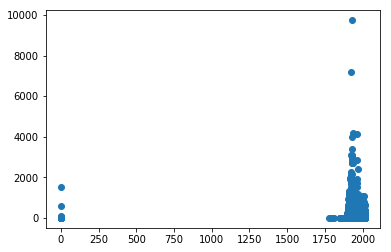

In [60]:
plt.scatter(df_BX2.YearBuilt,df_BX2.WaterIncidents)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


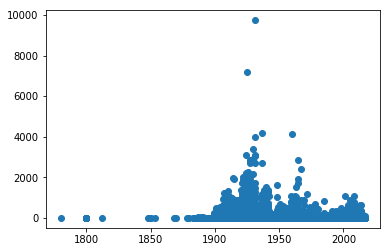

In [61]:
# drop 0 in year

df_BX2.drop(df_BX2[df_BX2.YearBuilt<1000].index,inplace=True)
#df_BX2.dropna(subset=['YearBuilt'],inplace=True)
plt.scatter(df_BX2.YearBuilt,df_BX2.WaterIncidents)

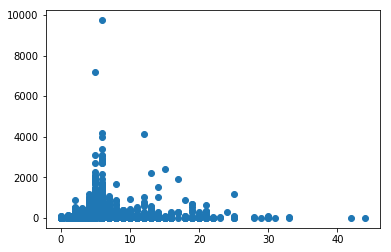

In [62]:
plt.scatter(df_BX2.NumFloors,df_BX2.WaterIncidents)

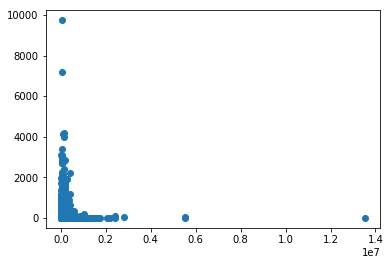

In [63]:
plt.scatter(df_BX2.BldgArea,df_BX2.WaterIncidents)

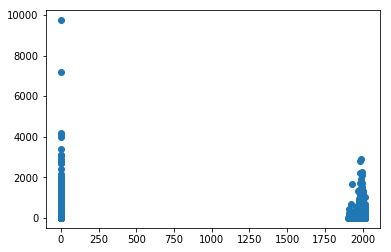

In [64]:
plt.scatter(df_BX2.YearAlter1,df_BX2.WaterIncidents)

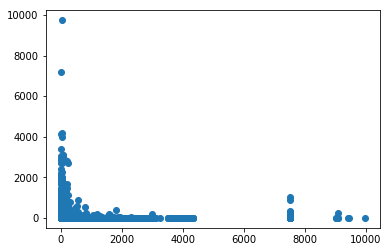

In [65]:
plt.scatter(df_BX2.Lot,df_BX2.WaterIncidents)

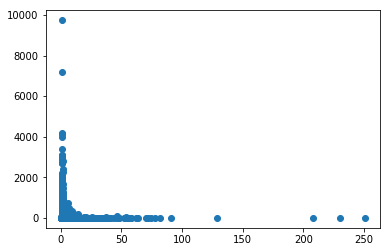

In [66]:
plt.scatter(df_BX2.NumBldgs,df_BX2.WaterIncidents)

using linear regression model to predict number of complaints

In [67]:
cdf = df_BX2[['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'YCoord','XCoord','WaterIncidents']]
cdf.head()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,YCoord,XCoord,WaterIncidents
Address,,,,,,,,,,,,,,,,,,,
1025 BOYNTON AVENUE,61500,87.00,4.99,0.0,4.8,54,12319,100.00,1,6.0,0,61500,2.43,0,1931,0,239710.0,1018133.0,9737
3810 BAILEY AVENUE,54001,92.00,2.53,0.0,4.8,7,21320,164.00,1,5.0,0,54000,3.44,0,1925,0,261446.0,1012722.0,7171
750 GRAND CONCOURSE,123000,110.00,5.91,0.0,6.5,26,20800,120.70,1,6.0,0,123000,6.02,0,1937,0,239122.0,1005249.0,4183
3555 BRUCKNER BOULEVARD,112000,53.33,6.40,0.0,4.8,10,17500,100.00,1,12.0,0,112000,3.44,0,1960,0,248258.0,1031866.0,4158
888 GRAND CONCOURSE,122800,178.00,4.32,0.0,6.5,34,28444,188.55,1,6.0,8000,111800,6.02,3000,1931,0,240335.0,1005800.0,3994


In [68]:
cdf.isnull().sum()

BldgArea            0
BldgDepth           0
BuiltFAR            0
CommFAR             0
FacilFAR            0
Lot                 0
LotArea             0
LotDepth            0
NumBldgs            0
NumFloors           0
OfficeArea          0
ResArea             0
ResidFAR            0
RetailArea          0
YearBuilt           0
YearAlter1          0
YCoord            238
XCoord            238
WaterIncidents      0
dtype: int64

In [69]:
cdf=cdf.dropna()
cdf.isnull().sum()

BldgArea          0
BldgDepth         0
BuiltFAR          0
CommFAR           0
FacilFAR          0
Lot               0
LotArea           0
LotDepth          0
NumBldgs          0
NumFloors         0
OfficeArea        0
ResArea           0
ResidFAR          0
RetailArea        0
YearBuilt         0
YearAlter1        0
YCoord            0
XCoord            0
WaterIncidents    0
dtype: int64

In [70]:
features = cdf.columns.tolist()
response = 'WaterIncidents'
features.remove(response)

X = cdf[features]
y = cdf[response]

In [71]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [72]:
# linear regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
x1 = np.asanyarray(X_train)
y1 = np.asanyarray(y_train)
regr.fit (x1, y1)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [-3.69295161e-04  4.87814160e-01  5.38114784e+00 -3.78621156e+00
 -1.04439869e+00 -4.13343176e-03  1.13607650e-05 -4.65769424e-02
 -1.57764649e+00  1.76118903e+01  5.72349276e-05  3.70202914e-04
  6.60898578e+00 -5.52622340e-04 -2.10853294e-01 -7.66968174e-04
  1.51766653e-04  4.02510976e-04]


In [73]:
y_hat= regr.predict(X_test)
x2 = np.asanyarray(X_test)
y2 = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y2) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x2, y2))

Residual sum of squares: 9167.53
Variance score: 0.11


In [74]:
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(X_train)
train_y = np.asanyarray(y_train)

test_x = np.asanyarray(X_test)
test_y = np.asanyarray(y_test)


poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 1.82000000e+03, 3.90000000e+01, ...,
        6.27697500e+16, 2.60117793e+17, 1.07792792e+18],
       [1.00000000e+00, 2.26000000e+03, 5.40000000e+01, ...,
        5.76786570e+16, 2.48530448e+17, 1.07088803e+18],
       [1.00000000e+00, 2.49900000e+03, 4.19300000e+01, ...,
        5.93659089e+16, 2.51467933e+17, 1.06519251e+18],
       ...,
       [1.00000000e+00, 1.61570000e+05, 3.98000000e+02, ...,
        5.58321949e+16, 2.37971438e+17, 1.01429659e+18],
       [1.00000000e+00, 1.05200000e+03, 4.90000000e+01, ...,
        5.88907853e+16, 2.52056739e+17, 1.07882072e+18],
       [1.00000000e+00, 3.44000000e+03, 8.00000000e+01, ...,
        5.90659364e+16, 2.49460360e+17, 1.05357631e+18]])

In [75]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [-2.13221799e-07 -4.03117586e-07  8.88215433e-07 ...  1.30905976e-12
 -5.52226734e-13  3.16147447e-14]
Intercept:  -1427.6890657002775


In [76]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 930.37
Residual sum of squares (MSE): 9587829372.38
R2-score: -0.00


In [77]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
regressor = DecisionTreeRegressor(random_state = 32)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=32, splitter='best')

In [79]:
predTree = regressor.predict(X_test)

In [80]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6001926782273603


Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?

In this exercise, you will use a feature-engineered dataset to determine whether a predictive model can be built to predict the complaint (of the Complaint Type that you decided to focus on in Week 2) by using past data.

Using the best model, you need to predict the number of future complaints (of the Complaint Type that you decided to focus on in Question 1).

In [81]:
df_NYC311_time=df_NYC311[df_NYC311['Borough']=='BRONX'][df_NYC311['Complaint Type']=="HEAT/HOT WATER"]['Created Date']

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [82]:
time_series = pd.Series(1, index = df_NYC311_time)

In [92]:

time_series = time_series.reset_index('Created Date')
time_series['Created Date'] = pd.to_datetime(time_series['Created Date'])
time_series = time_series.set_index('Created Date')

In [93]:
time_series = time_series.resample('M').sum()
time_series.head()

,0
Created Date,
2010-01-31,10
2010-02-28,2
2010-03-31,3
2010-04-30,0
2010-05-31,1


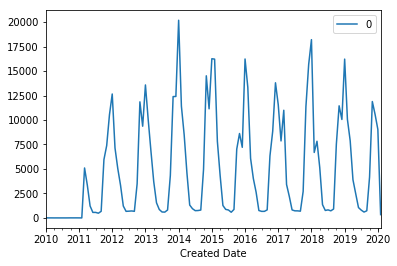

In [94]:
time_series.plot(kind='line')

In [95]:
import statsmodels.api as sm

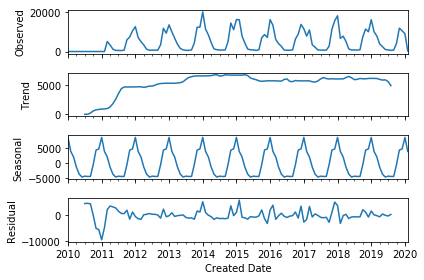

In [96]:
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')
fig = decomposition.plot()
plt.show()

In [97]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [88]:
#import warnings
#warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(time_series,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2494.911008758169
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2204.205689208104
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2069.0791937541553
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1808.582942856771
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2087.143832317595
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2084.555819976518


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1846.6691348454406
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1810.4852125764887
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2398.260325935484
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2136.214254015664
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2031.91037361248
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1784.6389682988497
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2186.0548382210322
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2148.894322347505
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1831.9553940963117
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1786.6080011167232
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2316.1542210566786
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2073.720056113363
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2064.3821954283835
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1814.4777665166575
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2066.2949923223414
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2038.884555951403
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1842.3852349060903
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1813.2025477831623

In [98]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1769.0835755544786  - min AIC value

mod = sm.tsa.statespace.SARIMAX(time_series,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3042      0.139      2.185      0.029       0.031       0.577
ma.L1         -0.8937      0.114     -7.832      0.000      -1.117      -0.670
ar.S.L12       0.5281      0.113      4.667      0.000       0.306       0.750
ma.S.L12      -0.9984      0.158     -6.304      0.000      -1.309      -0.688
sigma2       5.63e+06   1.08e+06      5.222      0.000    3.52e+06    7.74e+06


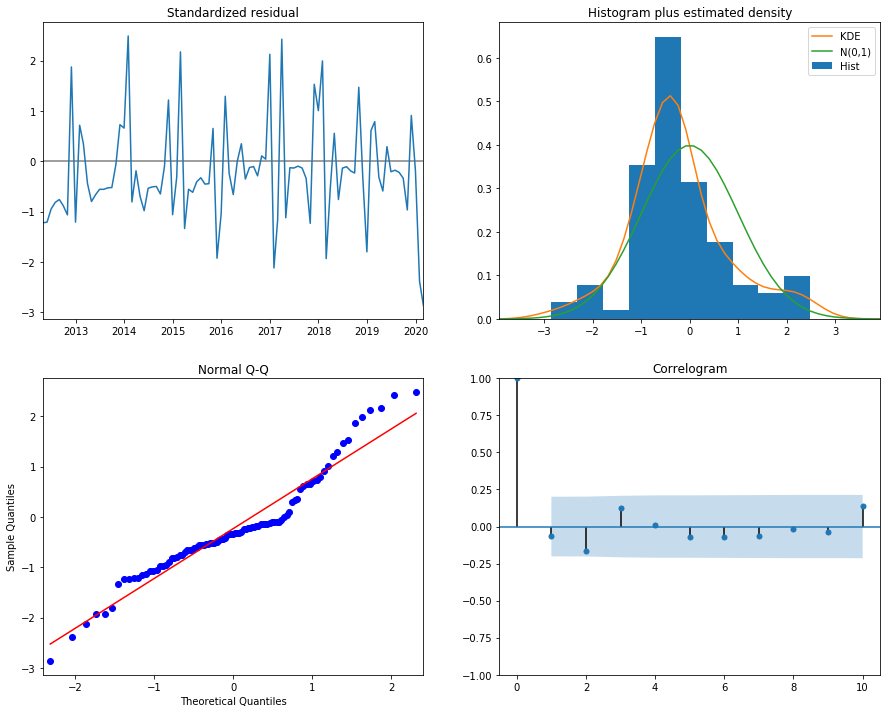

In [99]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [100]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-31'),dynamic=False)
pred_ci = pred.conf_int()

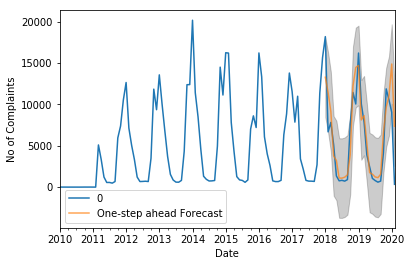

In [101]:
ax = time_series.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('No of Complaints')
plt.legend()

plt.show()

In [104]:
y_forecasted = pred.predicted_mean
y_forecasted = pd.DataFrame(y_forecasted)

y_truth = time_series['2018-01':]

# Compute the mean square error
mean_absolute_error = abs((y_forecasted[0] - y_truth[0] ) ** 1).mean()
print('The Mean Absolute Error of our forecasts is {}'.format(round(mean_absolute_error, 2)))

The Mean Absolute Error of our forecasts is 1972.57


In [112]:

# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

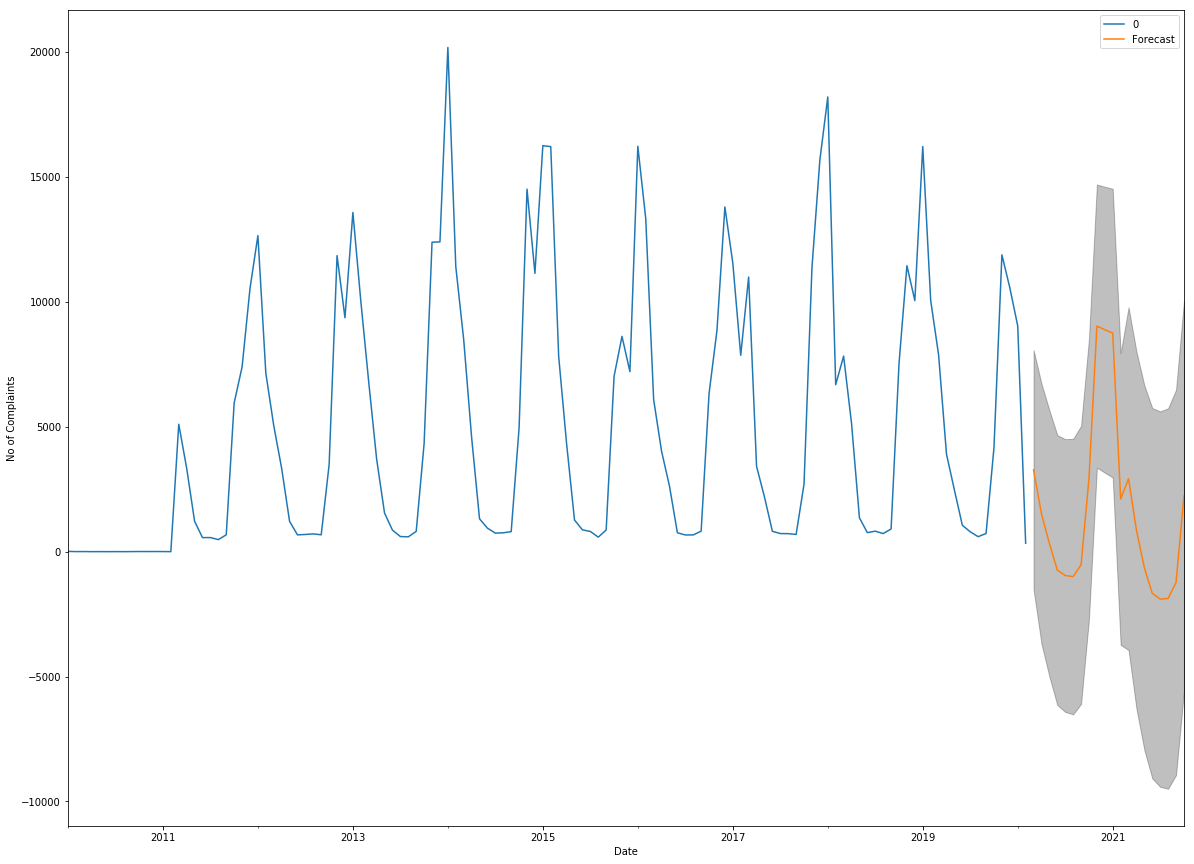

In [113]:
ax = time_series.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('No of Complaints')

plt.legend()
plt.show()